## Table of Contents

1. PCA & RDA overall (Main Catchments)
2. PCA & RDA Cluster 1
3. PCA & RDA Cluster 2
4. PCA & RDA Cluster 3
5. PCA & RDA Cluster 4

# 1. PCA & RDA Overall (Main Catchments)

Saving 6.67 x 6.67 in image


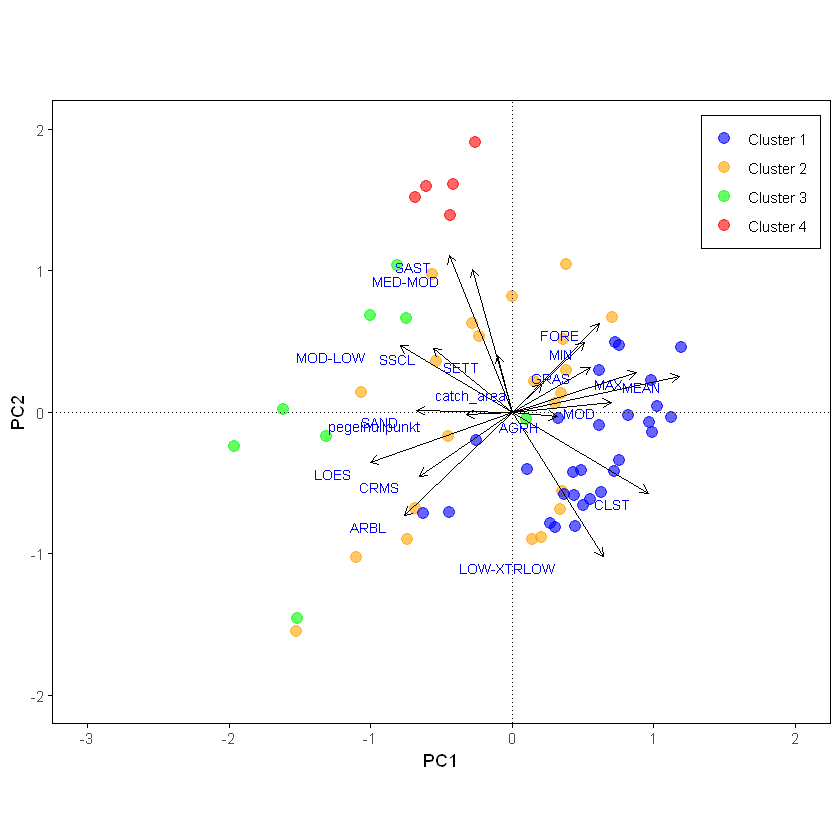

In [23]:
# Load necessary libraries
library(readxl)
library(vegan)
library(ggplot2)
library(BiodiversityR)
library(svglite)
library(grid)

# Load the data
file_path <- "C:/Users/Lenovo/Documents/Masterarbeit/Masterarbeit/3_arbeitsordner/PCA/PCA/PCA_hydrogeology_permeability_soils_landuse_elevation.xlsx"


data <- read_excel(file_path)

# Filter the data for 'ezg_id' == 'ges_ezg'
filtered_data <- data[data$ezg_id == "ges_ezg", ]

# Select relevant columns
columns_of_interest <- c('catch_area', 'CLST', 'CRMS', 'SAND', 'SAST', 'MED-MOD', 
                         'MOD', 'MOD-LOW', 'LOW-XTRLOW', 'SSCL', 'LOES', 'FORE', 
                         'AGRH', 'ARBL', 'GRAS', 'SETT', 'MEAN', 'MIN', 'MAX', 
                         'cluster', 'pegelnullpunkt')
filtered_data <- filtered_data[, columns_of_interest]

# Separate the features and the target variable (cluster)
X <- filtered_data[, !(names(filtered_data) %in% 'cluster')]
y <- as.factor(filtered_data$cluster)
levels(y) <- paste("Cluster", levels(y))

# Standardize the features
X_scaled <- scale(X)

# Perform PCA
pca_result <- rda(X_scaled)

# Extract PCA scores
scores <- scores(pca_result, display = "sites")

# Create a dataframe with PCA scores and cluster information
pca_df <- data.frame(PC1 = scores[, 1], PC2 = scores[, 2], cluster = y)

# Extract the variable vectors
vectors <- scores(pca_result, display = "species")

# Define colors for each cluster
colors <- c('blue', 'orange', 'green', 'red')
names(colors) <- levels(y)

# Plot the PCA results
p <- ggplot(pca_df, aes(x = PC1, y = PC2, color = cluster)) +
  geom_point(size = 3, alpha = 0.6) +
  scale_color_manual(values = colors) +
  theme_minimal() +
  ggtitle('') +
  xlab('PC1') +
  ylab('PC2') +
  theme(legend.title = element_blank(),
       legend.position = c(0.91, 0.87),  # Position legend inside the plot
        legend.background = element_rect(fill = alpha('white', 0.5)),  # Make the legend background semi-transparent
        panel.grid = element_blank(),
        axis.line = element_line(size = 0.5),
        panel.border = element_rect(color = "black", fill = NA, size = 0.5),
        axis.ticks = element_line(size = 0.5)) +
  geom_hline(yintercept = 0, linetype = "dotted", color = "black") +
  geom_vline(xintercept = 0, linetype = "dotted", color = "black") +
  geom_segment(data = as.data.frame(vectors), aes(x = 0, y = 0, xend = PC1, yend = PC2), 
               arrow = arrow(length = unit(0.2, "cm")), color = "black") +
  geom_text(data = as.data.frame(vectors), aes(x = PC1, y = PC2, label = rownames(vectors)), 
            color = "blue", vjust = 1.5, hjust = 1.5, size = 3) +
  coord_fixed(xlim = c(-3, 2), ylim = c(-2, 2))  # Ensure equal scaling of both axes

# Display the plot
print(p)

# Save the plot as SVG
ggsave("PCA_plot.svg", plot = p, device = "svg")


### Loadings

In [24]:
# Perform PCA
pca_result <- rda(X_scaled)

# Extract the loadings
loadings <- scores(pca_result, display = "species")

# Print the loadings
print(loadings)
summary(pca_result)

                      PC1          PC2
catch_area      0.2077606  0.198201941
CLST            0.9620649 -0.571466897
CRMS           -0.6567566 -0.451860554
SAND           -0.6747680  0.009386075
SAST           -0.4470682  1.105239314
MED-MOD        -0.2799432  1.005873047
MOD             0.6972824  0.070251001
MOD-LOW        -0.7923939  0.469036973
LOW-XTRLOW      0.6407742 -1.023080303
SSCL           -0.5587963  0.450052792
LOES           -1.0054928 -0.357175224
FORE            0.6138053  0.625989182
AGRH            0.3187183 -0.030219716
ARBL           -0.7613544 -0.733361182
GRAS            0.5504795  0.316773929
SETT           -0.1025962  0.399898830
MEAN            1.1795461  0.254018791
MIN             0.5078696  0.492021573
MAX             0.8749496  0.277370711
pegelnullpunkt -0.3225358 -0.018542298
attr(,"const")
[1] 5.934108



Call:
rda(X = X_scaled) 

Partitioning of variance:
              Inertia Proportion
Total              20          1
Unconstrained      20          1

Eigenvalues, and their contribution to the variance 

Importance of components:
                         PC1    PC2     PC3     PC4    PC5     PC6     PC7
Eigenvalue            5.0389 3.3964 1.80622 1.57165 1.4801 1.17552 1.09728
Proportion Explained  0.2519 0.1698 0.09031 0.07858 0.0740 0.05878 0.05486
Cumulative Proportion 0.2519 0.4218 0.51208 0.59066 0.6647 0.72344 0.77830
                          PC8     PC9   PC10    PC11    PC12    PC13    PC14
Eigenvalue            0.93814 0.87707 0.6599 0.59310 0.43172 0.34547 0.21470
Proportion Explained  0.04691 0.04385 0.0330 0.02965 0.02159 0.01727 0.01073
Cumulative Proportion 0.82521 0.86906 0.9021 0.93171 0.95330 0.97057 0.98131
                          PC15     PC16     PC17     PC18     PC19      PC20
Eigenvalue            0.117151 0.090482 0.059674 0.057488 0.032498 0.0165637
Propo

## 2. CLUSTER 1

In [18]:
# Load necessary libraries
library(readxl)
library(vegan)
library(ggplot2)
library(svglite)
library(grid)  # Needed for annotation_custom

# Define file path for cluster 1
file_path <- "C:/Users/Lenovo/Documents/Masterarbeit/Masterarbeit/3_arbeitsordner/PCA/PCA/cluster_1.xlsx"

# Load the data
data <- read_excel(file_path)

# Print the actual column names to understand the structure
print(colnames(data))

# Select only the numeric columns
numeric_columns <- c('catch_area', 'CLST', 'CRMS', 'SAND', 'SAST', 'MED-MOD', 
                     'MOD', 'MOD-LOW', 'LOW-XTRLOW', 'SSCL', 'LOES', 'FORE', 
                     'AGRH', 'ARBL', 'GRAS', 'SETT', 'MEAN', 'MIN', 'MAX', 
                     'pegelnullpunkt')

data_numeric <- data[, numeric_columns]

# Standardize the features
X_scaled1 <- scale(data_numeric)

# Perform PCA
pca_result1 <- rda(X_scaled1)

# Extract PCA scores
scores <- scores(pca_result1, display = "sites")
pca_df <- data.frame(PC1 = scores[, 1], PC2 = scores[, 2], cluster = "Cluster 1")

# Extract variable vectors
vectors <- scores(pca_result1, display = "species")

# Define color for the cluster
color <- 'blue'

# Plot the PCA results
p1 <- ggplot(pca_df, aes(x = PC1, y = PC2, color = cluster)) +
  geom_point(size = 3, alpha = 0.6) +
  scale_color_manual(values = setNames(color, "Cluster 1")) +
  theme_minimal() +
  ggtitle('') +
  xlab('PC1') +
  ylab('PC2') +
  theme(legend.title = element_blank(),
        legend.position = c(0.90, 0.90),  # Position legend inside the plot
        legend.background = element_rect(fill = alpha('white', 0.5)),  # Make the legend background semi-transparent
        panel.grid = element_blank(),
        axis.line = element_line(size = 0.5),
        panel.border = element_rect(color = "black", fill = NA, size = 0.5),
        axis.ticks = element_line(size = 0.5)) +
  geom_hline(yintercept = 0, linetype = "dotted", color = "black") +
  geom_vline(xintercept = 0, linetype = "dotted", color = "black") +
  geom_segment(data = as.data.frame(vectors), aes(x = 0, y = 0, xend = PC1, yend = PC2), 
               arrow = arrow(length = unit(0.2, "cm")), color = "black") +
  geom_text(data = as.data.frame(vectors), aes(x = PC1, y = PC2, label = rownames(vectors)), 
            color = "blue", vjust = 1.5, hjust = 1.5, size = 3) +
  coord_fixed(xlim = c(-3, 3), ylim = c(-2, 2)) +  # Ensure equal scaling of both axes
  annotation_custom(grob = textGrob("(a)", x = unit(0.05, "npc"), y = unit(0.95, "npc"), gp = gpar(fontsize = 15)))  # Add (a) in the plot

# Save the plot as SVG
ggsave("PCA_plot_cluster_1_with_annotations.svg", plot = p1, device = "svg")


 [1] "BEZEICHNER"     "messstelle"     "catch_area"     "CLST"          
 [5] "CRMS"           "SAND"           "SAST"           "MED-MOD"       
 [9] "MOD"            "MOD-LOW"        "LOW-XTRLOW"     "SSCL"          
[13] "LOES"           "FORE"           "AGRH"           "ARBL"          
[17] "GRAS"           "SETT"           "MEAN"           "MIN"           
[21] "MAX"            "REG"            "ezg_name"       "ezg_id"        
[25] "cluster"        "pegelnullpunkt"


Saving 6.67 x 6.67 in image


## Loadings

In [25]:
# Perform PCA
pca_result1 <- rda(X_scaled1)

# Extract the loadings
loadings1 <- scores(pca_result1, display = "species")

# Print the loadings
print(loadings1)

summary(pca_result1)

                       PC1         PC2
catch_area      0.35575354 -0.04162531
CLST            0.04923836 -1.00257534
CRMS            0.27955118  0.11627564
SAND            0.04392156 -0.06569668
SAST            0.77780904  0.55331677
MED-MOD         0.16223261 -0.09760789
MOD             0.64160126  0.16830598
MOD-LOW         0.43071509  0.67807503
LOW-XTRLOW     -0.81279772 -0.18719189
SSCL           -0.62456390  0.76585839
LOES           -0.10915880  0.11849339
FORE            0.43619851 -0.69140721
AGRH            0.09189873  0.37652451
ARBL           -0.83077247  0.42018363
GRAS            0.71328039  0.13000921
SETT            0.29080939 -0.10478975
MEAN            0.86230305 -0.04527599
MIN             0.57311253  0.53979431
MAX             0.89552686 -0.04551452
pegelnullpunkt -0.42018501  0.27766438
attr(,"const")
[1] 4.820571



Call:
rda(X = X_scaled1) 

Partitioning of variance:
              Inertia Proportion
Total              20          1
Unconstrained      20          1

Eigenvalues, and their contribution to the variance 

Importance of components:
                         PC1    PC2    PC3    PC4     PC5     PC6     PC7
Eigenvalue            5.1923 3.1509 2.6789 2.0016 1.34572 1.27906 1.07935
Proportion Explained  0.2596 0.1575 0.1339 0.1001 0.06729 0.06395 0.05397
Cumulative Proportion 0.2596 0.4172 0.5511 0.6512 0.71847 0.78242 0.83639
                          PC8     PC9    PC10    PC11    PC12     PC13     PC14
Eigenvalue            0.92914 0.62479 0.54575 0.41777 0.24842 0.192734 0.120010
Proportion Explained  0.04646 0.03124 0.02729 0.02089 0.01242 0.009637 0.006001
Cumulative Proportion 0.88285 0.91409 0.94138 0.96226 0.97469 0.984322 0.990323
                         PC15     PC16     PC17      PC18      PC19      PC20
Eigenvalue            0.09259 0.058867 0.028077 0.0129305 8.401e-04 2.40

# 3. CLUSTER 2

In [17]:
# Load necessary libraries
library(readxl)
library(vegan)
library(ggplot2)
library(svglite)
library(grid)  # Needed for annotation_custom

# Define file path for cluster 1
file_path <- "C:/Users/Lenovo/Documents/Masterarbeit/Masterarbeit/3_arbeitsordner/PCA/PCA/cluster_2.xlsx"

# Load the data
data <- read_excel(file_path)

# Print the actual column names to understand the structure
print(colnames(data))

# Select only the numeric columns
numeric_columns <- c('catch_area', 'CLST', 'CRMS', 'SAND', 'SAST', 'MED-MOD', 
                     'MOD', 'MOD-LOW', 'LOW-XTRLOW', 'SSCL', 'LOES', 'FORE', 
                     'AGRH', 'ARBL', 'GRAS', 'SETT', 'MEAN', 'MIN', 'MAX', 
                     'pegelnullpunkt')

data_numeric <- data[, numeric_columns]

# Standardize the features
X_scaled2 <- scale(data_numeric)

# Perform PCA
pca_result2 <- rda(X_scaled2)

# Extract PCA scores
scores <- scores(pca_result2, display = "sites")
pca_df <- data.frame(PC1 = scores[, 1], PC2 = scores[, 2], cluster = "Cluster 2")

# Extract variable vectors
vectors <- scores(pca_result2, display = "species")

# Define color for the cluster
color <- 'orange'

# Plot the PCA results
p2 <- ggplot(pca_df, aes(x = PC1, y = PC2, color = cluster)) +
  geom_point(size = 3, alpha = 0.6) +
  scale_color_manual(values = setNames(color, "Cluster 2")) +
  theme_minimal() +
  ggtitle('') +
  xlab('PC1') +
  ylab('PC2') +
  theme(legend.title = element_blank(),
        legend.position = c(0.90, 0.90),  # Position legend inside the plot
        legend.background = element_rect(fill = alpha('white', 0.5)),  # Make the legend background semi-transparent
        panel.grid = element_blank(),
        axis.line = element_line(size = 0.5),
        panel.border = element_rect(color = "black", fill = NA, size = 0.5),
        axis.ticks = element_line(size = 0.5)) +
  geom_hline(yintercept = 0, linetype = "dotted", color = "black") +
  geom_vline(xintercept = 0, linetype = "dotted", color = "black") +
  geom_segment(data = as.data.frame(vectors), aes(x = 0, y = 0, xend = PC1, yend = PC2), 
               arrow = arrow(length = unit(0.2, "cm")), color = "black") +
  geom_text(data = as.data.frame(vectors), aes(x = PC1, y = PC2, label = rownames(vectors)), 
            color = "blue", vjust = 1.5, hjust = 1.5, size = 3) +
  coord_fixed(xlim = c(-3, 3), ylim = c(-2, 2)) +  # Ensure equal scaling of both axes
  annotation_custom(grob = textGrob("(b)", x = unit(0.05, "npc"), y = unit(0.95, "npc"), gp = gpar(fontsize = 15)))  # Add (a) in the plot

# Save the plot as SVG
ggsave("PCA_plot_cluster_2_with_annotations.svg", plot = p2, device = "svg")



 [1] "BEZEICHNER"     "messstelle"     "catch_area"     "CLST"          
 [5] "CRMS"           "SAND"           "SAST"           "MED-MOD"       
 [9] "MOD"            "MOD-LOW"        "LOW-XTRLOW"     "SSCL"          
[13] "LOES"           "FORE"           "AGRH"           "ARBL"          
[17] "GRAS"           "SETT"           "MEAN"           "MIN"           
[21] "MAX"            "REG"            "ezg_name"       "ezg_id"        
[25] "cluster"        "pegelnullpunkt"


Saving 6.67 x 6.67 in image


### Loadings

In [28]:
# Perform PCA
pca_result2 <- rda(X_scaled2)

# Extract the loadings
loadings2 <- scores(pca_result2, display = "species")

# Print the loadings
print(loadings2)

summary(pca_result2)

                       PC1         PC2
catch_area     -0.20598156 -0.19576125
CLST           -0.08612698 -0.79949049
CRMS            0.60044253  0.37967990
SAND            0.07266430  0.57456572
SAST           -0.44351517  0.73025480
MED-MOD        -0.67506787  0.16030145
MOD            -0.37831598 -0.31161095
MOD-LOW        -0.17635102  0.82242622
LOW-XTRLOW      0.66670017 -0.58407028
SSCL            0.30944981  0.36618018
LOES            0.80945423  0.28175910
FORE           -0.57957459 -0.05241245
AGRH           -0.32651387  0.25745685
ARBL            0.84642255 -0.13029868
GRAS           -0.78353155 -0.04347315
SETT           -0.34330322  0.12007020
MEAN           -0.82273017 -0.33037675
MIN            -0.65031740 -0.04257725
MAX            -0.35596807 -0.04430504
pegelnullpunkt  0.08759451 -0.18026414
attr(,"const")
[1] 4.527019



Call:
rda(X = X_scaled2) 

Partitioning of variance:
              Inertia Proportion
Total              20          1
Unconstrained      20          1

Eigenvalues, and their contribution to the variance 

Importance of components:
                         PC1    PC2    PC3    PC4     PC5     PC6     PC7
Eigenvalue            5.4286 3.2074 2.2027 2.1629 1.52728 1.32088 1.17489
Proportion Explained  0.2714 0.1604 0.1101 0.1081 0.07636 0.06604 0.05874
Cumulative Proportion 0.2714 0.4318 0.5419 0.6501 0.72645 0.79249 0.85123
                          PC8     PC9    PC10    PC11     PC12     PC13
Eigenvalue            0.77680 0.60482 0.57780 0.45527 0.198987 0.136533
Proportion Explained  0.03884 0.03024 0.02889 0.02276 0.009949 0.006827
Cumulative Proportion 0.89007 0.92032 0.94921 0.97197 0.981918 0.988745
                          PC14     PC15     PC16      PC17      PC18      PC19
Eigenvalue            0.085091 0.067742 0.039811 0.0178034 0.0101045 0.0027615
Proportion Explained  0.

# 4. CLUSTER 3

 [1] "BEZEICHNER"     "messstelle"     "catch_area"     "CLST"          
 [5] "CRMS"           "SAND"           "SAST"           "MED-MOD"       
 [9] "MOD"            "MOD-LOW"        "LOW-XTRLOW"     "SSCL"          
[13] "LOES"           "FORE"           "AGRH"           "ARBL"          
[17] "GRAS"           "SETT"           "MEAN"           "MIN"           
[21] "MAX"            "REG"            "ezg_name"       "ezg_id"        
[25] "cluster"        "pegelnullpunkt"


Saving 6.67 x 6.67 in image


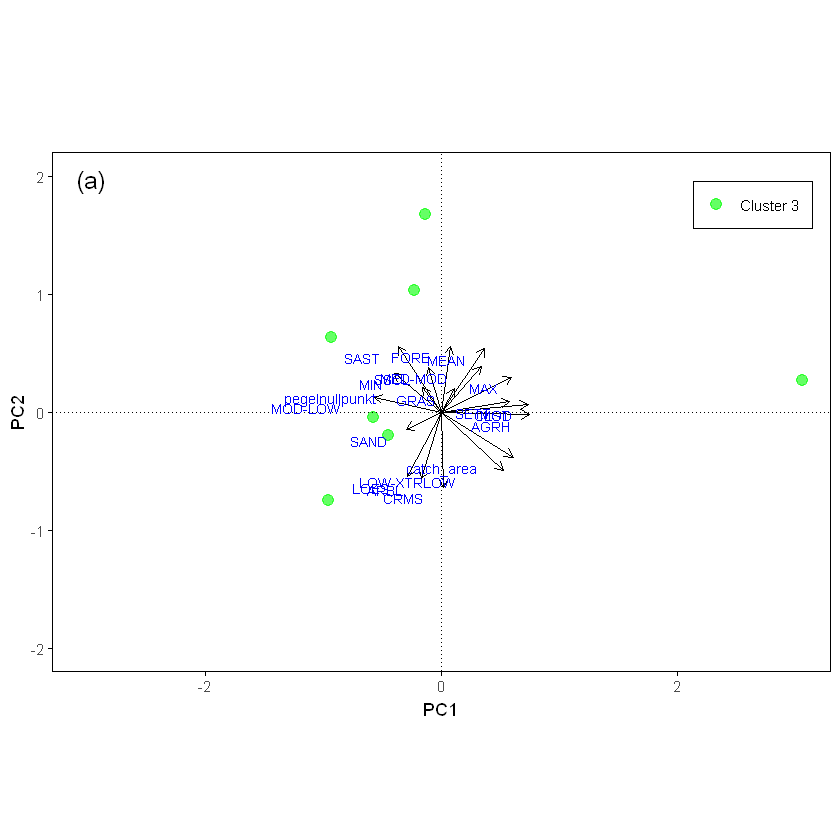

In [27]:
# Load necessary libraries
library(readxl)
library(vegan)
library(ggplot2)
library(svglite)
library(grid)  # Needed for annotation_custom

# Define file path for cluster 1
file_path <- "C:/Users/Lenovo/Documents/Masterarbeit/Masterarbeit/3_arbeitsordner/PCA/PCA/cluster_3.xlsx"

# Load the data
data <- read_excel(file_path)

# Print the actual column names to understand the structure
print(colnames(data))

# Select only the numeric columns
numeric_columns <- c('catch_area', 'CLST', 'CRMS', 'SAND', 'SAST', 'MED-MOD', 
                     'MOD', 'MOD-LOW', 'LOW-XTRLOW', 'SSCL', 'LOES', 'FORE', 
                     'AGRH', 'ARBL', 'GRAS', 'SETT', 'MEAN', 'MIN', 'MAX', 
                     'pegelnullpunkt')

data_numeric <- data[, numeric_columns]

# Standardize the features
X_scaled3 <- scale(data_numeric)

# Perform PCA
pca_result3 <- rda(X_scaled3)

# Extract PCA scores
scores <- scores(pca_result3, display = "sites")
pca_df <- data.frame(PC1 = scores[, 1], PC2 = scores[, 2], cluster = "Cluster 3")

# Extract variable vectors
vectors <- scores(pca_result3, display = "species")

# Define color for the cluster
color <- 'green'

# Plot the PCA results
p3 <- ggplot(pca_df, aes(x = PC1, y = PC2, color = cluster)) +
  geom_point(size = 3, alpha = 0.6) +
  scale_color_manual(values = setNames(color, "Cluster 3")) +
  theme_minimal() +
  ggtitle('') +
  xlab('PC1') +
  ylab('PC2') +
  theme(legend.title = element_blank(),
        legend.position = c(0.90, 0.90),  # Position legend inside the plot
        legend.background = element_rect(fill = alpha('white', 0.5)),  # Make the legend background semi-transparent
        panel.grid = element_blank(),
        axis.line = element_line(size = 0.5),
        panel.border = element_rect(color = "black", fill = NA, size = 0.5),
        axis.ticks = element_line(size = 0.5)) +
  geom_hline(yintercept = 0, linetype = "dotted", color = "black") +
  geom_vline(xintercept = 0, linetype = "dotted", color = "black") +
  geom_segment(data = as.data.frame(vectors), aes(x = 0, y = 0, xend = PC1, yend = PC2), 
               arrow = arrow(length = unit(0.2, "cm")), color = "black") +
  geom_text(data = as.data.frame(vectors), aes(x = PC1, y = PC2, label = rownames(vectors)), 
            color = "blue", vjust = 1.5, hjust = 1.5, size = 3) +
  coord_fixed(xlim = c(-3, 3), ylim = c(-2, 2)) +  # Ensure equal scaling of both axes
  annotation_custom(grob = textGrob("(a)", x = unit(0.05, "npc"), y = unit(0.95, "npc"), gp = gpar(fontsize = 15)))  # Add (a) in the plot

# Save the plot as SVG
ggsave("PCA_plot_cluster_3_with_annotations.svg", plot = p3, device = "svg")

print(p3)

### Loadings 

In [29]:
# Perform PCA
pca_result3 <- rda(X_scaled3)

# Extract the loadings
loadings3 <- scores(pca_result3, display = "species")

# Print the loadings
print(loadings3)

summary(pca_result3)

                       PC1         PC2
catch_area      0.60711807 -0.38274596
CLST            0.73204424  0.06519053
CRMS            0.01924018 -0.63516371
SAND           -0.29972971 -0.14958632
SAST           -0.36928907  0.55580904
MED-MOD         0.33439727  0.38620129
MOD             0.73204424  0.06519053
MOD-LOW        -0.56702515  0.12806542
LOW-XTRLOW      0.52460528 -0.49798002
SSCL           -0.11397725  0.37642500
LOES           -0.28953028 -0.54875217
FORE            0.07123434  0.55844960
AGRH            0.74716220 -0.02032768
ARBL           -0.17008756 -0.56375439
GRAS            0.10984486  0.19963855
SETT            0.57863594  0.08755478
MEAN            0.36650536  0.53678632
MIN            -0.40188475  0.32995394
MAX             0.59406987  0.29445663
pegelnullpunkt -0.16136975  0.20962138
attr(,"const")
[1] 3.439791



Call:
rda(X = X_scaled3) 

Partitioning of variance:
              Inertia Proportion
Total              20          1
Unconstrained      20          1

Eigenvalues, and their contribution to the variance 

Importance of components:
                         PC1    PC2    PC3    PC4     PC5     PC6     PC7
Eigenvalue            6.9070 4.9887 3.4420 2.3804 1.82336 0.24442 0.21412
Proportion Explained  0.3454 0.2494 0.1721 0.1190 0.09117 0.01222 0.01071
Cumulative Proportion 0.3454 0.5948 0.7669 0.8859 0.97707 0.98929 1.00000


# 5. CLUSTER 4

In [ ]:
# Load necessary libraries
library(readxl)
library(vegan)
library(ggplot2)
library(svglite)
library(grid)  # Needed for annotation_custom

# Define file path for cluster 1
file_path <- "C:/Users/Lenovo/Documents/Masterarbeit/Masterarbeit/3_arbeitsordner/PCA/PCA/cluster_4.xlsx"

# Load the data
data <- read_excel(file_path)

# Print the actual column names to understand the structure
print(colnames(data))

# Select only the numeric columns
numeric_columns <- c('catch_area', 'CLST', 'CRMS', 'SAND', 'SAST', 'MED-MOD', 
                      'MOD-LOW', 'LOW-XTRLOW', 'SSCL', 'LOES', 'FORE', 
                     'AGRH', 'ARBL', 'GRAS', 'SETT', 'MEAN', 'MIN', 'MAX', 
                     'pegelnullpunkt')

data_numeric <- data[, numeric_columns]

# Standardize the features
X_scaled4 <- scale(data_numeric)

# Perform PCA
pca_result4 <- rda(X_scaled4)

# Extract PCA scores
scores <- scores(pca_result4, display = "sites")
pca_df <- data.frame(PC1 = scores[, 1], PC2 = scores[, 2], cluster = "Cluster 4")

# Extract variable vectors
vectors <- scores(pca_result4, display = "species")

# Define color for the cluster
color <- 'red'

# Plot the PCA results
p4 <- ggplot(pca_df, aes(x = PC1, y = PC2, color = cluster)) +
  geom_point(size = 3, alpha = 0.6) +
  scale_color_manual(values = setNames(color, "Cluster 4")) +
  theme_minimal() +
  ggtitle('') +
  xlab('PC1') +
  ylab('PC2') +
  theme(legend.title = element_blank(),
        legend.position = c(0.90, 0.90),  # Position legend inside the plot
        legend.background = element_rect(fill = alpha('white', 0.5)),  # Make the legend background semi-transparent
        panel.grid = element_blank(),
        axis.line = element_line(size = 0.5),
        panel.border = element_rect(color = "black", fill = NA, size = 0.5),
        axis.ticks = element_line(size = 0.5)) +
  geom_hline(yintercept = 0, linetype = "dotted", color = "black") +
  geom_vline(xintercept = 0, linetype = "dotted", color = "black") +
  geom_segment(data = as.data.frame(vectors), aes(x = 0, y = 0, xend = PC1, yend = PC2), 
               arrow = arrow(length = unit(0.2, "cm")), color = "black") +
  geom_text(data = as.data.frame(vectors), aes(x = PC1, y = PC2, label = rownames(vectors)), 
            color = "blue", vjust = 1.5, hjust = 1.5, size = 3) +
  coord_fixed(xlim = c(-3, 3), ylim = c(-2, 2)) +  # Ensure equal scaling of both axes
  annotation_custom(grob = textGrob("(b)", x = unit(0.05, "npc"), y = unit(0.95, "npc"), gp = gpar(fontsize = 15)))  # Add (a) in the plot

# Save the plot as SVG
ggsave("PCA_plot_cluster_4_with_annotations.svg", plot = p4, device = "svg")


### Loadings

In [30]:
# Perform PCA
pca_result4 <- rda(X_scaled4)

# Extract the loadings
loadings4 <- scores(pca_result4, display = "species")

# Print the loadings
print(loadings4)

summary(pca_result4)

                      PC1         PC2
catch_area      0.1997118  0.60260887
CLST           -0.2750564  0.27223887
CRMS           -0.4140448 -0.42913357
SAND           -0.1812442 -0.17540081
SAST           -0.3809245  0.31416351
MED-MOD        -0.5963484 -0.10201539
MOD-LOW         0.4751574  0.35668264
LOW-XTRLOW      0.5357913 -0.34733371
SSCL            0.2543076 -0.14082264
LOES           -0.4636740 -0.37431932
FORE           -0.6603741  0.04860887
AGRH            0.6444607  0.03145259
ARBL            0.6055020  0.17568709
GRAS            0.4909382 -0.42054212
SETT            0.5870180 -0.24708775
MEAN           -0.3131647  0.53049394
MIN             0.5681367  0.30729280
MAX            -0.5006238  0.43021718
pegelnullpunkt -0.3810816 -0.38481766
attr(,"const")
[1] 2.952592



Call:
rda(X = X_scaled4) 

Partitioning of variance:
              Inertia Proportion
Total              19          1
Unconstrained      19          1

Eigenvalues, and their contribution to the variance 

Importance of components:
                         PC1    PC2    PC3    PC4
Eigenvalue            9.2266 4.6863 2.8522 2.2349
Proportion Explained  0.4856 0.2466 0.1501 0.1176
Cumulative Proportion 0.4856 0.7323 0.8824 1.0000
